In [1]:
import spacy
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
nlp = spacy.load('./data/embeddings_disc/')

In [2]:
categoria = 'orientacion'

In [3]:
lectura = '../datos/entrenamiento_modelos_categorias/tweets_entrenamiento_' + categoria + '_balance.csv'
data = pd.read_csv(lectura)

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,full_text,categoria_1-ap,categoria_2-dis,categoria_3-ed,categoria_4-gen,categoria_5-id,label,categoria_7-rel
0,250672,251798,maricon ultimos 100 pendejo,0,0,0,0,0,1,0
1,250673,251799,fico puto,0,0,0,0,0,1,0
2,250674,251800,puto usted messi saquense chingar puta,0,0,0,0,0,1,0
3,250675,251801,duermete puto deja chingando,0,0,0,0,0,1,0
4,250676,251802,prender ir cine lastimosamente cines cerrados ...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
340367,255274,752060,aqui recordando bloqueo instagram jajajajajajaja,0,0,0,0,0,0,0
340368,255275,831861,gente tarde puedo asique stream mananero vamos...,0,0,0,0,0,0,0
340369,255276,725607,nunca t,0,0,0,0,0,0,0
340370,255277,610798,asi ser pensamientos positivos menos presiones...,0,0,0,0,0,0,0


In [5]:
train, test = train_test_split(data, test_size=0.2,random_state = 202008)

In [6]:
npEmbeddings2 = np.empty([0, 300])
for texto in test['full_text']:
    
    #print(frase)
    
    # process a sentence using the model
    doc = nlp(texto)
    
    # print(doc.vector.shape)
    #print(npEmbeddings.shape)
    #print(doc.vector.shape)
    
    if doc.vector.shape[0]==300:
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
    else:
        npAux = np.empty([1, 300])
        doc = nlp('prueba')
        #npEmbeddings = np.append(npEmbeddings, npAux, axis = 0)
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
        predicted_svm = clf.predict([doc.vector])
        
npEmbeddings2.shape

(68075, 300)

In [7]:
import pickle as pickle

carga_modelo = '../modelos/modelo_capa2_' + categoria +'.p'
pickleFile = open(carga_modelo, 'rb')
best_model = pickle.load(pickleFile)
pickleFile.close()

In [8]:
y_probas = best_model.predict_proba(npEmbeddings2)
y_true = test['label']
y_prob = pd.DataFrame(y_probas)
y_prob.columns = ["cero","uno"]
y_prob = y_prob["uno"] 

In [9]:
y_prob = best_model.predict(npEmbeddings2)
confusion_matrix(y_true, y_prob)

array([[50683,   248],
       [ 1418, 15726]])

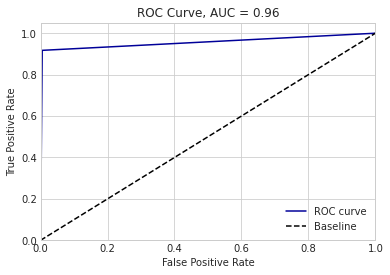

In [10]:
#Definimos la funcion que graficará la ROC
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, 
                                             test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('seaborn-whitegrid')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return  
plot_ROC(y_true, y_prob) 

In [11]:
metrics.f1_score(y_true, y_prob)

0.9496950298931094

In [12]:
metrics.recall_score(y_true, y_prob)

0.9172888474101727